In [1]:
import numpy as np
import pandas as pd
import re
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('sdoh_index_ky.csv')

In [27]:
df_index = df.iloc[:, :4]
df_values = df.iloc[:, 4:]

In [28]:
pattern = re.compile('pct.\w*')
df_values = pd.concat([df_values.iloc[:,:2] , df.loc[:,df.columns.str.match(pattern)]], axis = 1)
df_values.index = df_index.FIPS
df_quant = df_values.iloc[:, 2:]
df_qual = df_values.iloc[:, :2].astype(str)
df_quant_col = df_quant.columns
df = pd.concat([df_qual, df_quant], axis = 1)

First, let's take a look at the pairwise scatter plots and the individual histograms

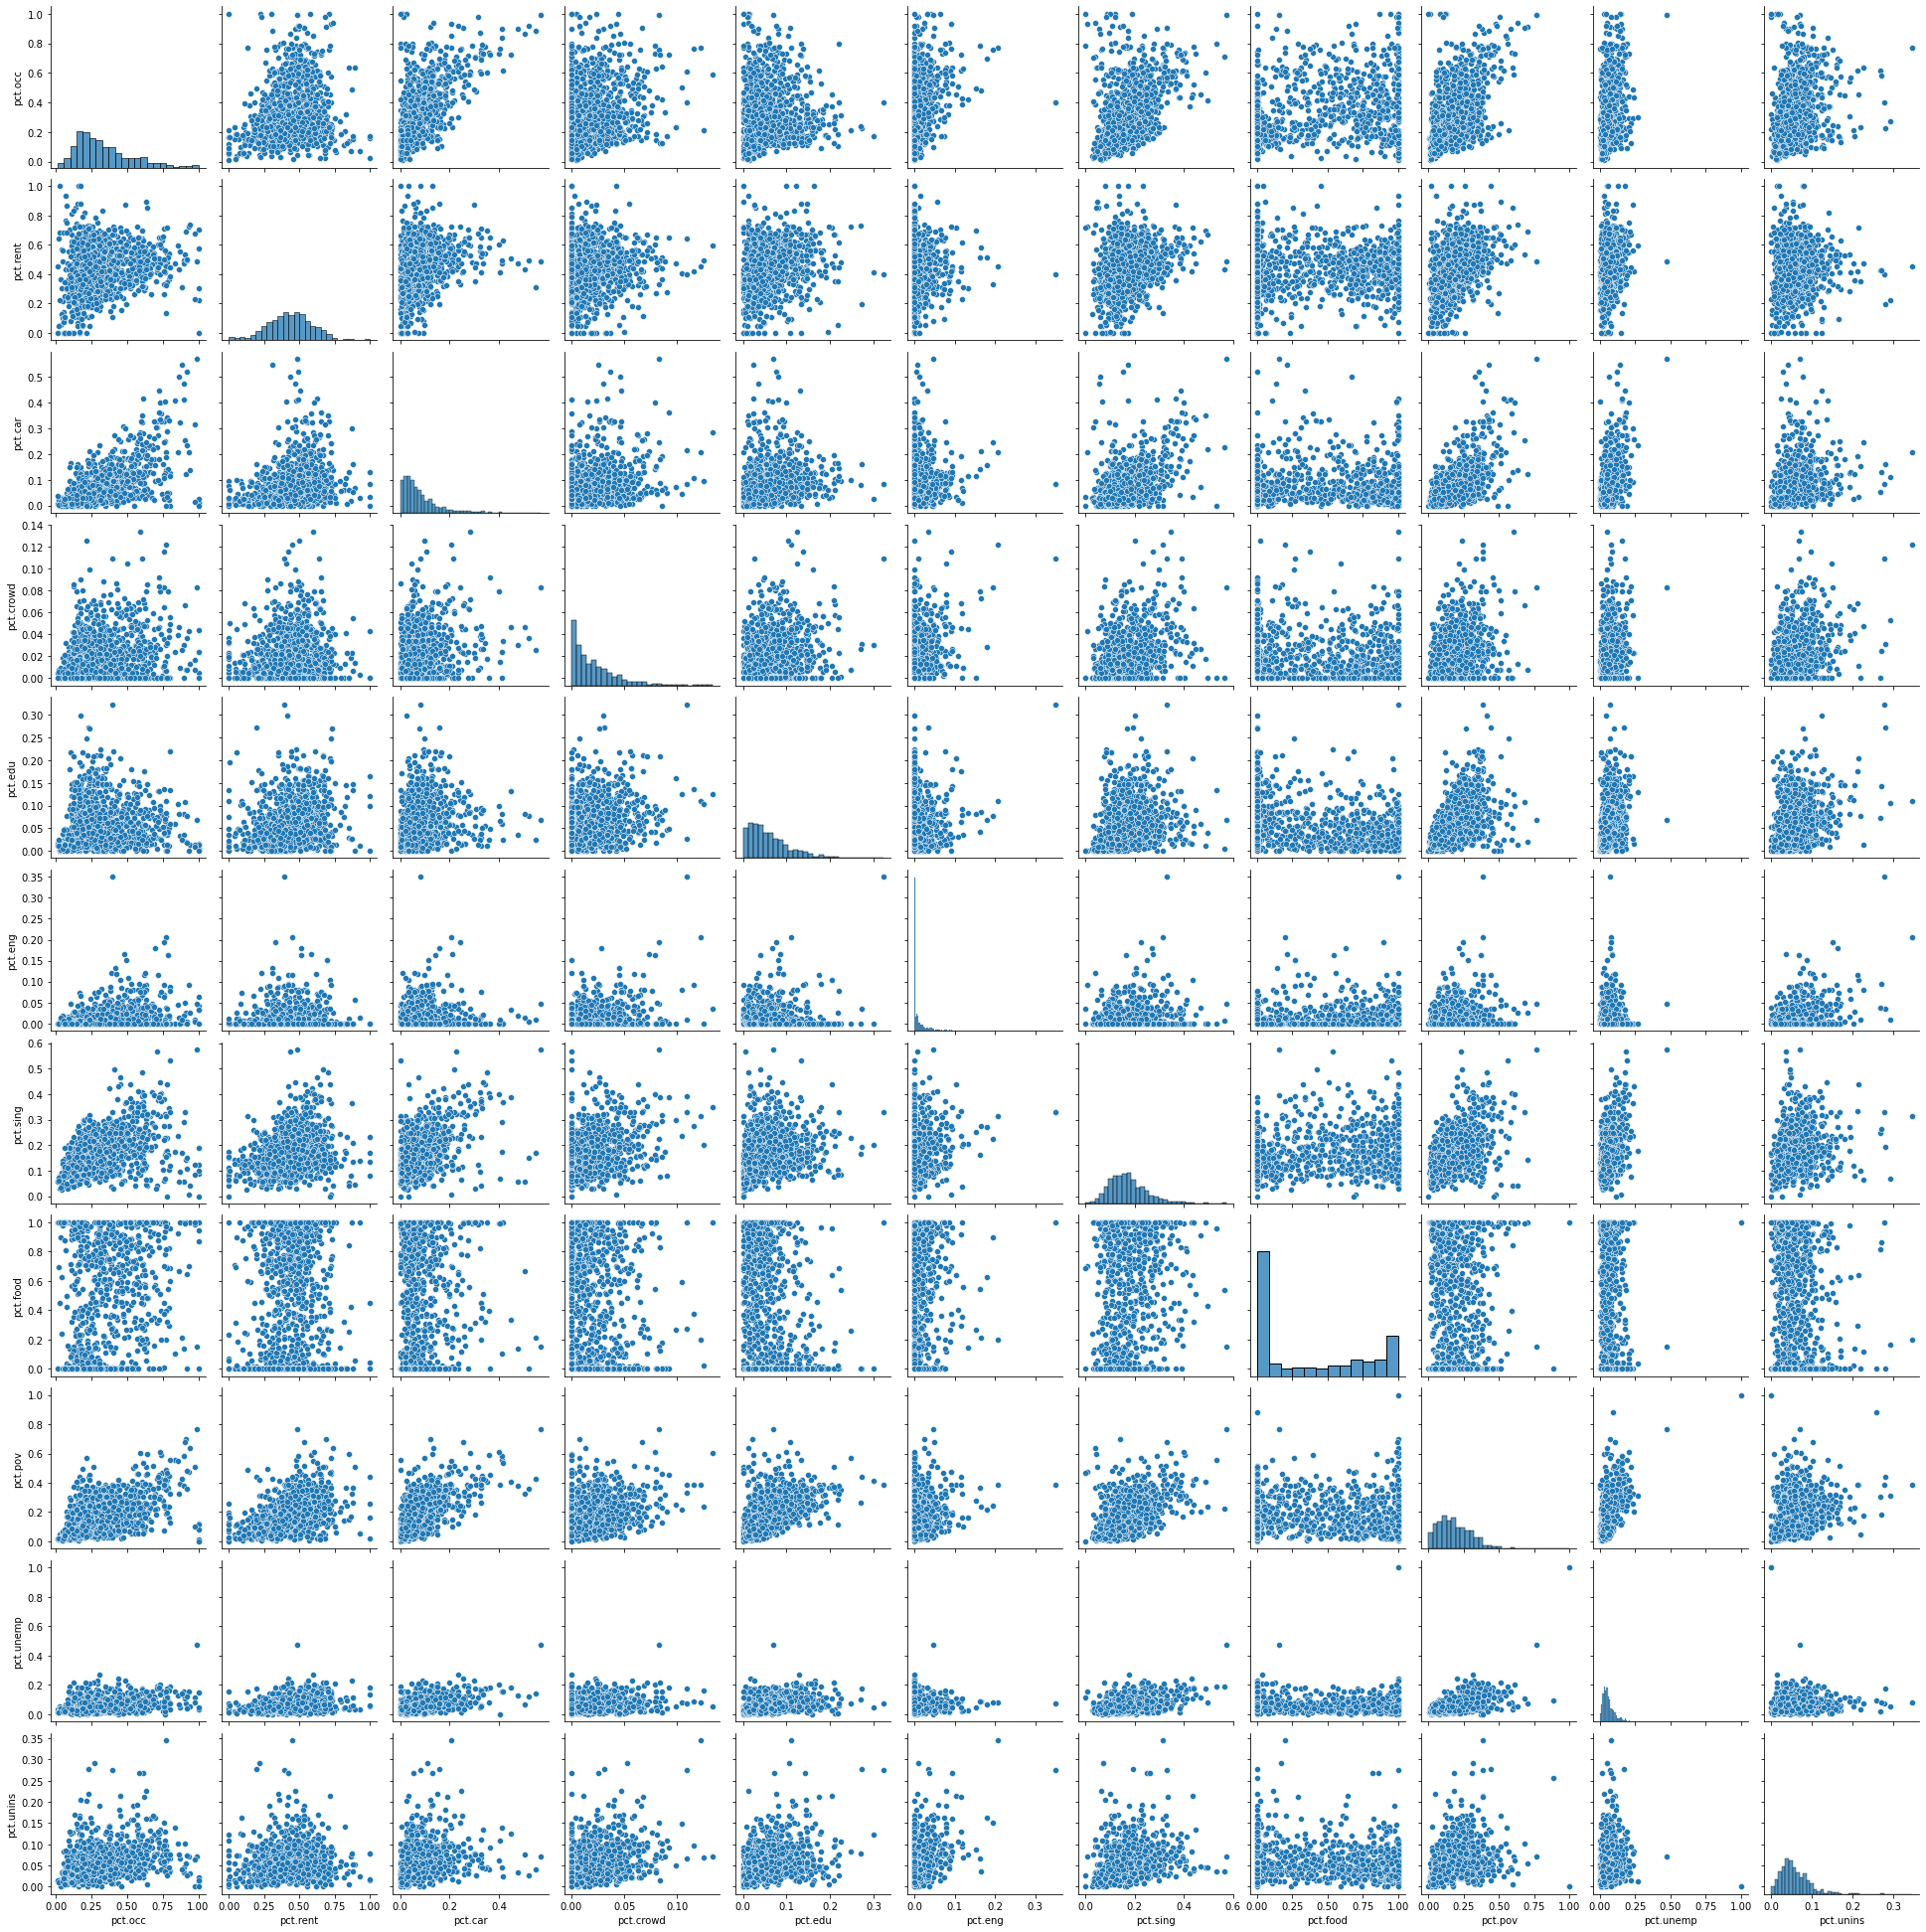

In [29]:
sns.pairplot(df_quant)

We need to transform some of the variables to have them approximately normal

In [30]:
from sklearn.preprocessing import PowerTransformer
ptf = PowerTransformer()
df_quant = pd.DataFrame(ptf.fit_transform(df_quant), columns = df_quant_col)

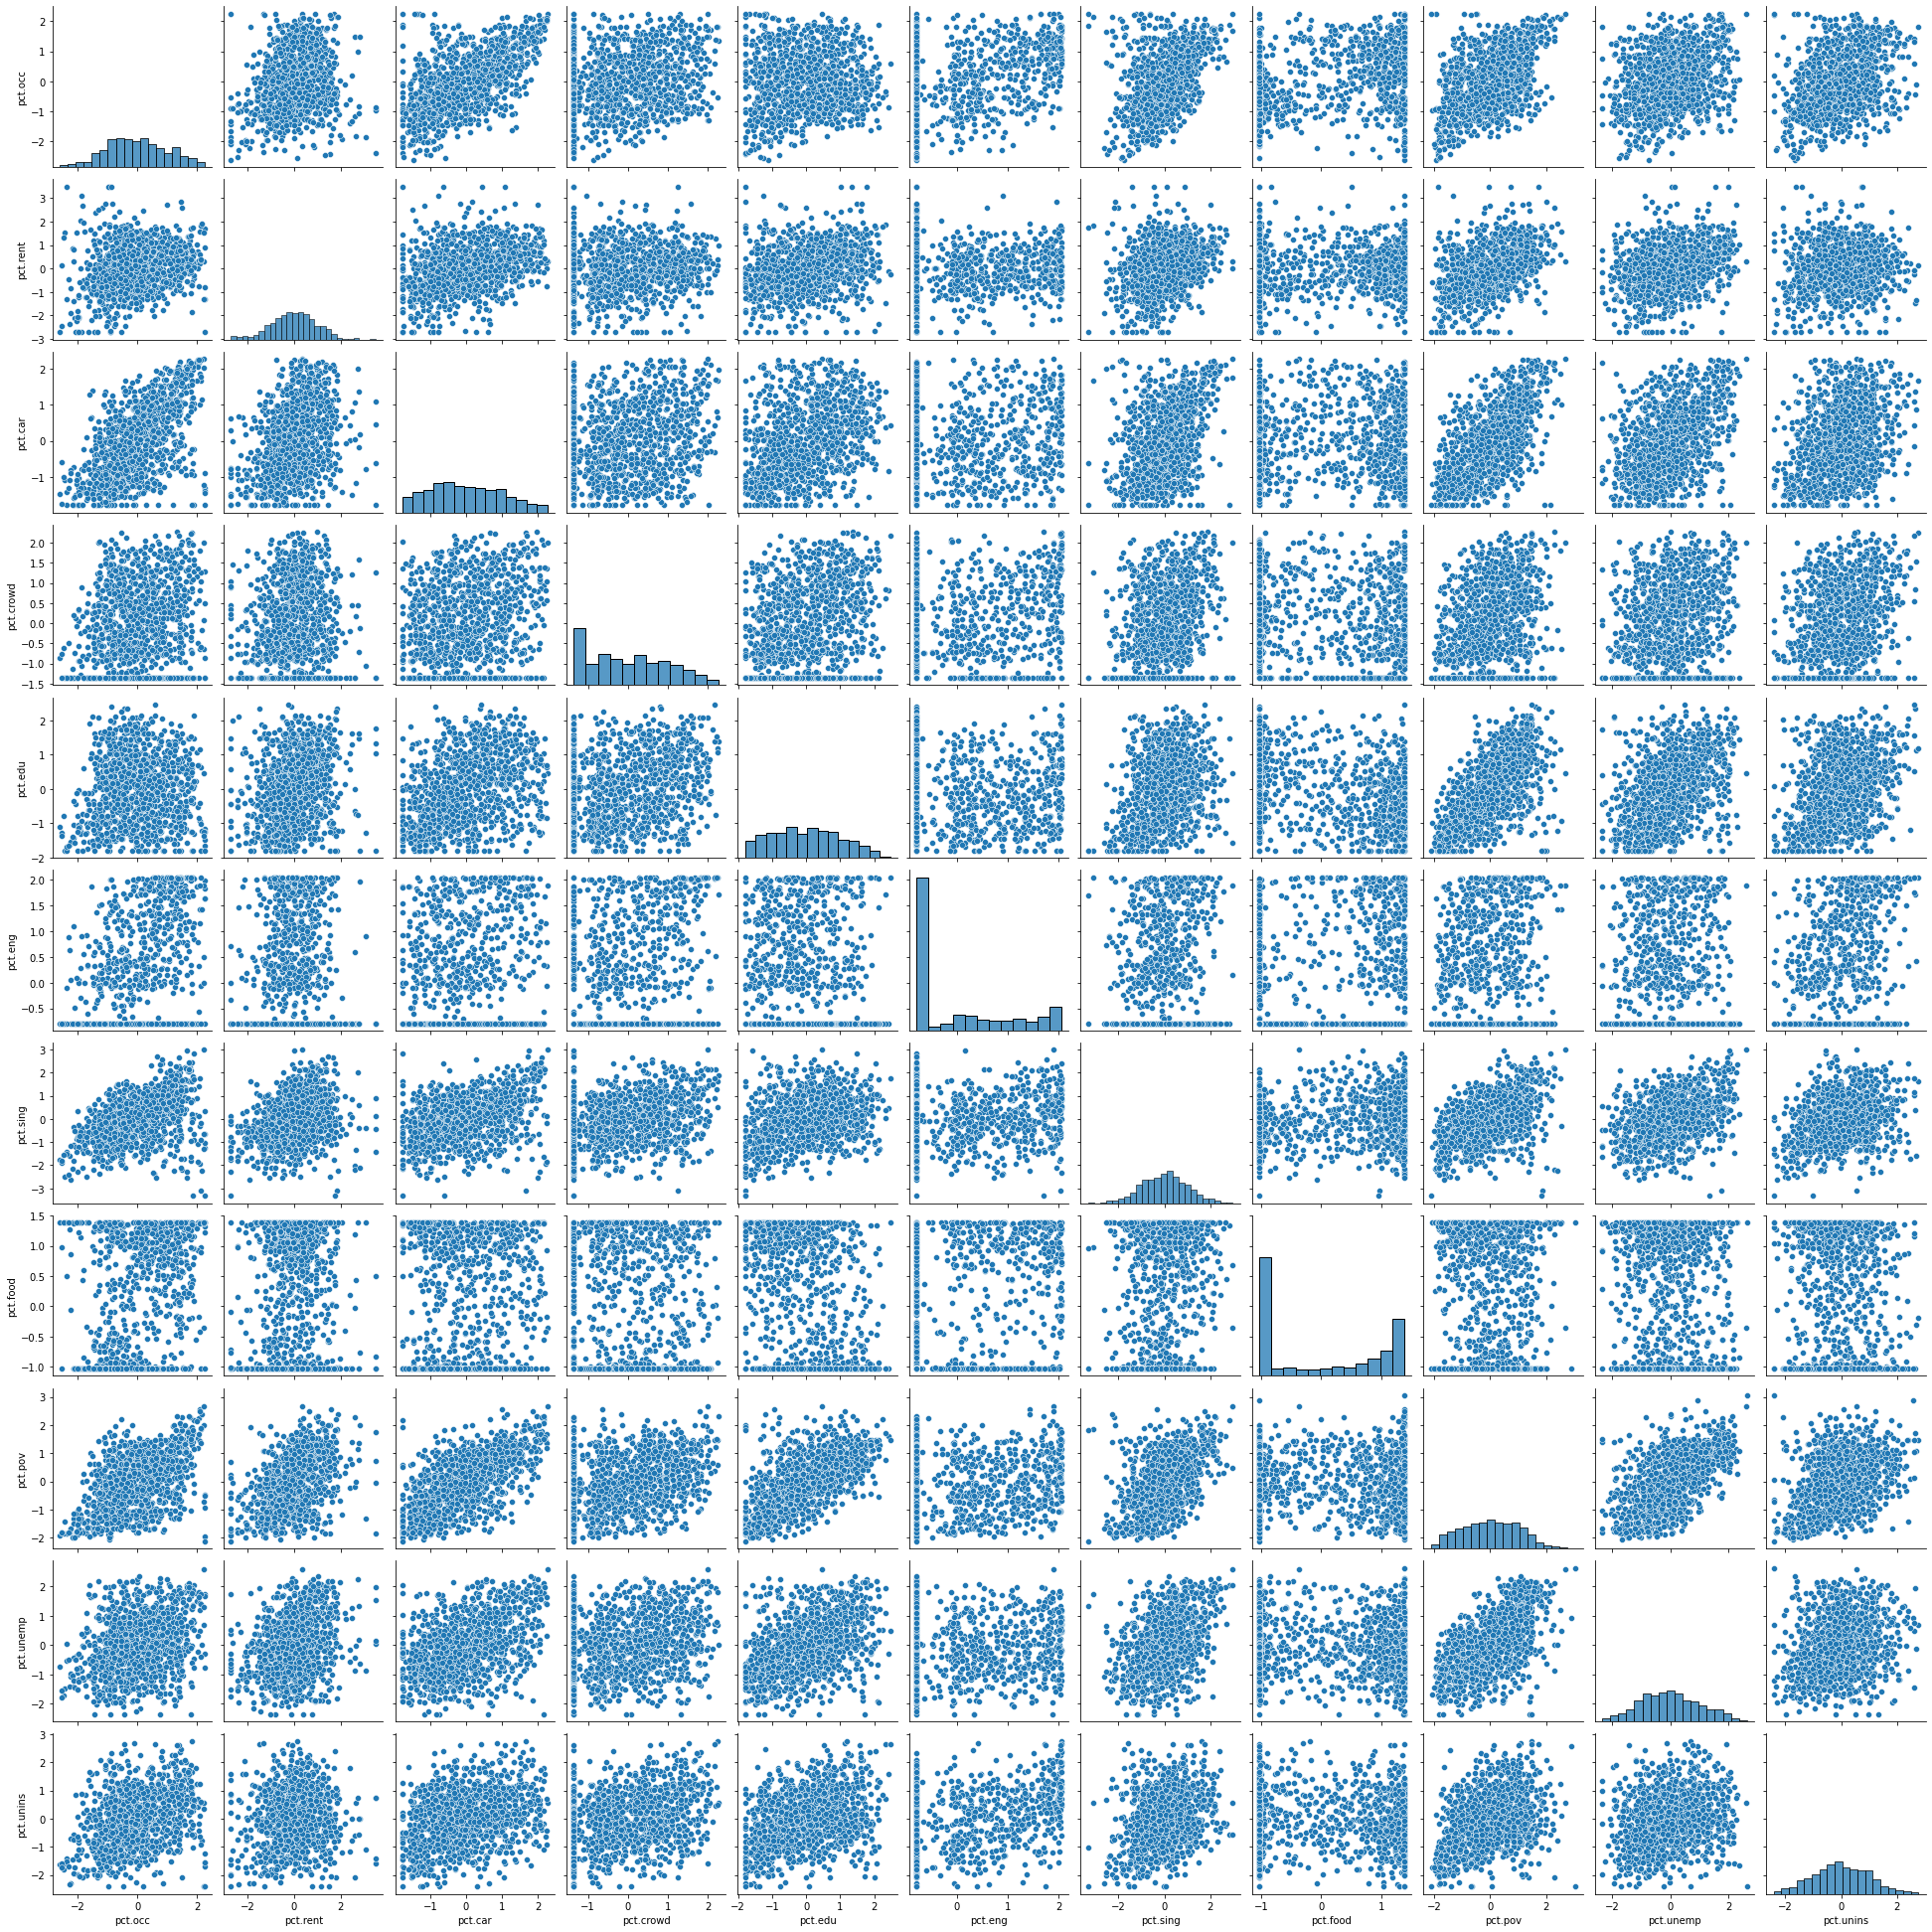

In [31]:
sns.pairplot(df_quant)

Note that **`pct.Eng` and `pct.Food`** has a bimodal distribution where the modes are located at the end of each side.

### 1. **Principal Component Analysis**

In [32]:
df

rural appalachia   pct.occ  pct.rent   pct.car  pct.crowd  \
FIPS                                                                    
21001970100     1          1  0.107717  0.444444  0.049839   0.014469   
21001970200     1          1  0.158031  0.383178  0.019430   0.046632   
21001970300     1          1  0.111588  0.672414  0.042918   0.010300   
21001970401     1          1  0.470525  0.403394  0.184424   0.061114   
21001970402     1          1  0.257394  0.507407  0.032774   0.035971   
...           ...        ...       ...       ...       ...        ...   
21239050106     0          0  0.210678  0.367424  0.029582   0.007215   
21239050107     0          0  0.185304  0.332103  0.029393   0.012780   
21239050200     0          0  0.108553  0.314685  0.004605   0.009211   
21239050300     0          0  0.379562  0.362903  0.058394   0.013382   
21239050400     0          0  0.311351  0.350000  0.021622   0.006486   

              pct.edu   pct.eng  pct.sing  pct.food   pct.pov  pct.unemp  \
FIPS                                                                       
21001970100  0.095041  0.000000  0.138264  0.562089  0.208463   0.029630   
21001970200  0.066894  0.000000  0.081606  0.000000  0.131913   0.041016   
21001970300  0.147154  0.000000  0.191416  0.000208  0.245856   0.055723   
21001970401  0.101706  0.000000  0.159005  0.000000  0.214000   0.065841   
21001970402  0.083082  0.000000  0.120703  0.000000  0.181311   0.068424   
...               ...       ...       ...       ...       ...        ...   
21239050106  0.015823  0.000000  0.106782  0.977450  0.071923   0.020463   
21239050107  0.048090  0.030671  0.153355  0.401949  0.106893   0.039927   
21239050200  0.024037  0.000000  0.059868  0.000000  0.088203   0.031770   
21239050300  0.028070  0.015815  0.099757  0.000000  0.047140   0.066116   
21239050400  0.045022  0.010811  0.137297  0.000000  0.092742   0.050989   

             pct.unins  
FIPS                    
21001970100   0.024891  
21001970200   0.057331  
21001970300   0.020872  
21001970401   0.045337  
21001970402   0.094819  
...                ...  
21239050106   0.024317  
21239050107   0.065829  
21239050200   0.010104  
21239050300   0.040870  
21239050400   0.094893  

[1115 rows x 13 columns]